# Bradford Pear Bounty

## NCSU Forest Health Lab
#### Kelly Oten, Connor Bonham, Abby Ratcliff (change this if needed)


In [1]:

import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#So here i read in my data sets as csv files and named them df (short for data frame) followed by the first letter of the event location. 
dfW = pd.read_csv('./Data/BPBDataWilm.csv')
dfS = pd.read_csv('./Data/BPBDataSanf.csv')
dfR = pd.read_csv('./Data/BPBDataRuth.csv')
dfC = pd.read_csv('./Data/BPBDataCata.csv')

In [3]:
#these 4 head blocks are just to double check the file is read in correctly
dfW.head()


,Date,#tree,reg id,event,city,zip,county,first,last
0,Nov. 4 2023,2,169963,HQEVENT_BRADFORDWILM_110423,Wilmington,28409,New Hanover,Shauna,Ainsley
1,Nov. 4 2023,5,170641,HQEVENT_BRADFORDWILM_110423,Durham,27713,Durham,Ralph,Bullock
2,Nov. 4 2023,2,170708,HQEVENT_BRADFORDWILM_110423,Leland,28451,Brunswick,Meredith,Ross
3,Nov. 4 2023,4,170842,HQEVENT_BRADFORDWILM_110423,Charlotte,28269,Mecklenburg,Erica,Verner
4,Nov. 4 2023,5,170837,HQEVENT_BRADFORDWILM_110423,Rocky Point,28457,Pender,Fred,Champion


In [4]:
dfS.head()


,Date,reg id,event,doc,city,zip,county,first,last,#tree,...,#redbud,#atlanticwhitecedar,#whitefringetree,#persimmon,#americanholly,#sourwood,#blackcherry,#whiteoak,#shumardoak,#baldcypress
0,Oct. 28 2023,170635.0,HQEVENT_BRADFORDSANFORD_102823,0,Clinton,28328.0,Sampson,Matthew,Stone,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oct. 28 2023,170809.0,HQEVENT_BRADFORDSANFORD_102823,2,Durham,27703.0,Durham,Breanuh,Polk,5,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oct. 28 2023,170819.0,HQEVENT_BRADFORDSANFORD_102823,1,Moncure,27559.0,Chatham,Bill,Carberry,4,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Oct. 28 2023,170836.0,HQEVENT_BRADFORDSANFORD_102823,3,West End,27376.0,Moore,Kim,Stepnoski,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,Oct. 28 2023,170868.0,HQEVENT_BRADFORDSANFORD_102823,1,Pittsboro,27312.0,Chatham,Lynn,Bailor,3,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [5]:
dfR.head()


,Date,#tree,reg id,event,city,zip,county,first,last
0,Oct. 28 2023,3,169494,HQEVENT Bradford Bounty Catawba Co 042223,Hickory,28601,Catawba,Donna,Barger
1,Oct. 28 2023,2,170589,HQEVENT_BRADFORDRUTHERF_102823,Charlotte,28214,Mecklenburg,Kim,Barnes
2,Oct. 28 2023,5,171178,HQEVENT_BRADFORDRUTHERF_102823,Forest City,28043,Rutherford,Michael,Beheler
3,Oct. 28 2023,5,170691,HQEVENT_BRADFORDRUTHERF_102823,Forest City,28043,Rutherford,Taylor,Birdsley
4,Oct. 28 2023,4,170715,HQEVENT_BRADFORDRUTHERF_102823,Spindale,28160,Rutherford,L.jean,Brusseau


In [6]:
dfC.head()


,Date,reg id,event,city,zip,county,first,last,#tree,#americanholly,...,#boxelder,#ironwood,#redmaple,#riverbirch,#chinquapin,#whiteoak,#scarletoak,#swampchestnutoak,#cherrybarkoak,#redmulberry
0,Apr. 22 2023,169593,HQEVENT Bradford Bounty Catawba Co 042223,Granite Falls,28630,Caldwell,Nathan,Beane,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apr. 22 2023,169141,HQEVENT Bradford Bounty Catawba Co 042223,Taylorsville,28681,Alexander,Kristi,Lail,5,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,Apr. 22 2023,169546,HQEVENT Bradford Bounty Catawba Co 042223,Taylorsville,28681,Alexander,Dillon,Deitz,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr. 22 2023,169145,HQEVENT Bradford Bounty Catawba Co 042223,Hiddenite,28636,Alexander,Chris,Smith,5,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,NaN,NaN
4,Apr. 22 2023,169004,HQEVENT Bradford Bounty Catawba Co 042223,Statesville,28625,Iredell,Kristopher,Honeycutt,1,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [7]:
#I found what column in each df is titled "#tree" for ease of access to just those columns in all four dfs.
tree_column_indices = {}
for df_name, df in zip(['dfW', 'dfS', 'dfR', 'dfC'], [dfW, dfS, dfR, dfC]):
    tree_column_indices[df_name] = df.columns.get_loc('#tree')

tree_column_indices
#this was just to double check it worked

{'dfW': 1, 'dfS': 9, 'dfR': 1, 'dfC': 8}

In [8]:
#I summed all entries for each df under the #tree column so printed result is dfW (the wilmington event) replaced 24 trees etc.
tree_sums = {}
for df_name, df in zip(['dfW', 'dfS', 'dfR', 'dfC'], [dfW, dfS, dfR, dfC]):
    tree_sums[df_name] = df.iloc[:, tree_column_indices[df_name]].sum()

print(tree_sums)    

{'dfW': 24, 'dfS': 216, 'dfR': 92, 'dfC': 183}


In [9]:
#finding the total number of trees that were replaced during all four events.
grand_total = sum(tree_sums.values())
print(grand_total)

515


In [20]:
#isolating the location and data from the dfs
dfW_loccount = dfW[['county', '#tree']]
dfS_loccount = dfS[['county', '#tree']]
dfR_loccount = dfR[['county', '#tree']]
dfC_loccount = dfC[['county', '#tree']]

# Concatenating the zipcount files so I can assess the entire project as well as the individual events.
all_loccount_df = pd.concat([dfW_loccount, dfS_loccount, dfR_loccount, dfC_loccount])
all_loccount_df


,county,#tree
0,New Hanover,2
1,Durham,5
2,Brunswick,2
3,Mecklenburg,4
4,Pender,5
...,...,...
46,Catawba,2
47,Catawba,1
48,Catawba,5
49,Catawba,5


In [11]:
# Save the combined df to data folder for reference
all_loccount_df.to_csv("Data/all_loccount.csv", index=False)

In [12]:
county_shp = "Data/NC_Counties/counties.shp"
counties_gdf = gpd.read_file(county_shp)
counties_gdf

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry
0,1,1.0,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,WSRO,194502.424760,1.594526e+10,"POLYGON ((-8853514.087 4333890.334, -8854417.1..."
1,2,2.0,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,WSRO,205797.586927,1.833739e+10,"POLYGON ((-8909472.546 4336065.305, -8906846.4..."
2,3,3.0,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,WSRO,177272.968717,1.211521e+10,"POLYGON ((-8853514.087 4333890.334, -8853463.1..."
3,4,4.0,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,MRO,144599.548259,7.345997e+09,"POLYGON ((-9020123.382 4306915.833, -9017719.5..."
4,5,5.0,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,WSRO,223033.815060,2.202688e+10,"POLYGON ((-8910804.874 4289745.058, -8906021.2..."
...,...,...,...,...,...,...,...,...,...,...,...
95,96,96.0,172698.187500,ROWAN,ROWA,335082.468750,566593.969329,MRO,212737.946739,1.459618e+10,"POLYGON ((-8956678.787 4265467.747, -8956639.3..."
96,97,97.0,138930.328125,LINCOLN,LINC,196551.218750,455807.279973,MRO,170626.329750,8.561766e+09,"POLYGON ((-9076711.364 4240834.013, -9076701.7..."
97,98,98.0,192864.546875,MECKLENBURG,MECK,351606.437500,632756.423077,MRO,236507.398318,1.521717e+10,"POLYGON ((-9010997.879 4230477.548, -9006508.2..."
98,99,99.0,133645.343750,CABARRUS,CABA,233367.062500,438468.114614,MRO,164101.209806,1.016546e+10,"POLYGON ((-8992841.086 4233034.497, -8987599.9..."


<Axes: >

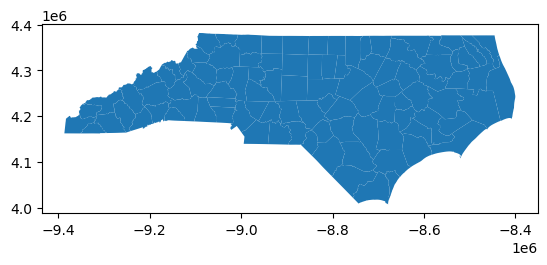

In [16]:
counties_gdf.plot()

In [18]:
counties_gdf.rename(columns={'CO_NAME': 'county'}, inplace=True)
counties_gdf


,FID,OBJECTID,PERIMETER,county,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry
0,1,1.0,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,WSRO,194502.424760,1.594526e+10,"POLYGON ((-8853514.087 4333890.334, -8854417.1..."
1,2,2.0,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,WSRO,205797.586927,1.833739e+10,"POLYGON ((-8909472.546 4336065.305, -8906846.4..."
2,3,3.0,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,WSRO,177272.968717,1.211521e+10,"POLYGON ((-8853514.087 4333890.334, -8853463.1..."
3,4,4.0,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,MRO,144599.548259,7.345997e+09,"POLYGON ((-9020123.382 4306915.833, -9017719.5..."
4,5,5.0,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,WSRO,223033.815060,2.202688e+10,"POLYGON ((-8910804.874 4289745.058, -8906021.2..."
...,...,...,...,...,...,...,...,...,...,...,...
95,96,96.0,172698.187500,ROWAN,ROWA,335082.468750,566593.969329,MRO,212737.946739,1.459618e+10,"POLYGON ((-8956678.787 4265467.747, -8956639.3..."
96,97,97.0,138930.328125,LINCOLN,LINC,196551.218750,455807.279973,MRO,170626.329750,8.561766e+09,"POLYGON ((-9076711.364 4240834.013, -9076701.7..."
97,98,98.0,192864.546875,MECKLENBURG,MECK,351606.437500,632756.423077,MRO,236507.398318,1.521717e+10,"POLYGON ((-9010997.879 4230477.548, -9006508.2..."
98,99,99.0,133645.343750,CABARRUS,CABA,233367.062500,438468.114614,MRO,164101.209806,1.016546e+10,"POLYGON ((-8992841.086 4233034.497, -8987599.9..."
